In [ ]:
#importing the necessary modules
from keras.datasets import mnist
import numpy as np

In [ ]:
#loading data
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Training data:


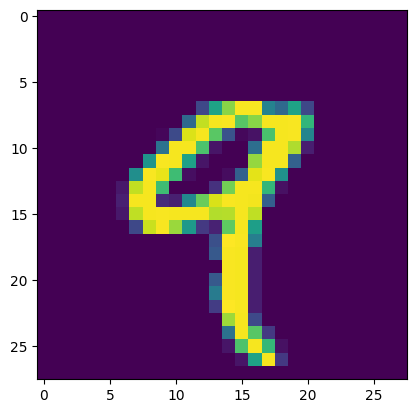

Label of this image is 9


In [ ]:
#What mnist images look like
import matplotlib.pyplot as plt
print("Training data:")
plt.imshow(xtrain[4])
plt.show()
print("Label of this image is",ytrain[4])


In [ ]:

#reshaping data as needed by the model
xtrain=np.reshape(xtrain,(-1,28,28,1))
xtest=np.reshape(xtest,(-1,28,28,1))
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((60000, 28, 28, 1), (10000, 28, 28, 1), (60000,), (10000,))

In [ ]:
#normalising
xtrain=xtrain/255
xtest=xtest/255

In [ ]:
#implementing one hot encoding
from keras.utils import to_categorical
y_train = to_categorical(ytrain, num_classes=10)
y_test = to_categorical(ytest, num_classes=10)


In [ ]:
#importing the model
from keras.models import Sequential


In [ ]:
#creating model object
model=Sequential()

In [ ]:
#importing layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [ ]:
#adding layers and forming the model
model.add(Conv2D(32, kernel_size=5, strides=1, padding="same", activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(padding="same"))
#model.summary()
##print output size

# After first Conv2D and MaxPooling2D

model.add(Conv2D(64,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128,kernel_size=5,strides=1,padding="same",activation="relu"))
model.add(MaxPooling2D(padding="same"))

model.add(Flatten())

model.add(Dense(1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(10,activation="softmax"))

ValueError: Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (None, 10)

In [ ]:
#compiling
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


In [ ]:
#training the model
model.fit(xtrain,y_train,batch_size=100,epochs=1,validation_data=(xtest,y_test))

600/600 ━━━━━━━━━━━━━━━━━━━━ 283s 470ms/step - accuracy: 0.8835 - loss: 0.3477 - val_accuracy: 0.9873 - val_loss: 0.0419


In [ ]:
#model train and test scores
model.evaluate(xtrain,y_train),model.evaluate(xtest,y_test)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9873 - loss: 0.0397
313/313 ━━━━━━━━━━━━━━━━━━━━ 15s 48ms/step - accuracy: 0.9839 - loss: 0.0525


([0.03947868198156357, 0.9876000285148621],
 [0.04186354950070381, 0.9872999787330627])

In [ ]:
# predicted values
y_pred_enc = model.predict(xtest)

# actual
y_act = [np.argmax(i) for i in y_test]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
[3.3693411e-08 8.7025278e-08 2.3937625e-07 5.4107472e-06 2.8293130e-09
 5.6379337e-09 1.4271575e-13 9.9999374e-01 3.5867060e-08 4.5459171e-07]
7


In [ ]:
# model performance metrics
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.96      1.00      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.98      0.98       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



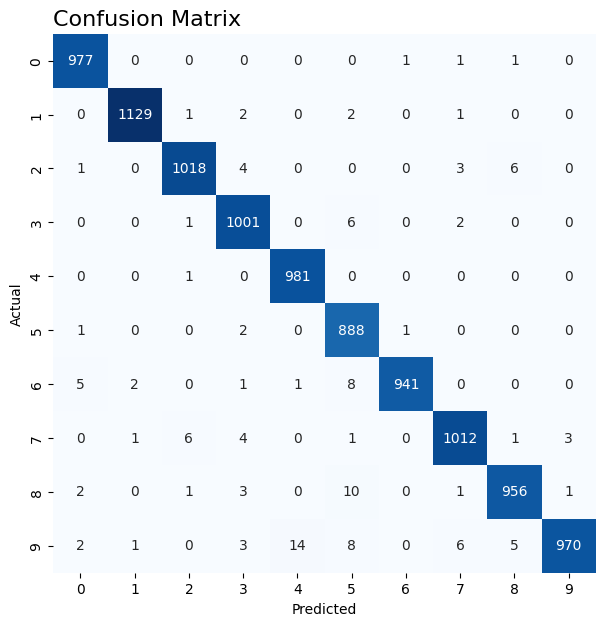

In [ ]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True,
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [ ]:
# After first Conv2D and MaxPooling2D
print("Shape after first Conv2D: ", model.layers[0].output_shape)
print("Shape after first MaxPooling: ", model.layers[1].output_shape)

# After second Conv2D and MaxPooling2D
print("Shape after second Conv2D: ", model.layers[2].output_shape)
print("Shape after second MaxPooling: ", model.layers[3].output_shape)

# After third Conv2D and MaxPooling2D
print("Shape after third Conv2D: ", model.layers[4].output_shape)
print("Shape after third MaxPooling: ", model.layers[5].output_shape)

# After Flatten
print("Shape after Flatten: ", model.layers[6].output_shape)

# After first Dense
print("Shape after Dense (1024 units): ", model.layers[7].output_shape)

# After final Dense (output)
print("Shape after Dense (output layer): ", model.layers[9].output_shape)


AttributeError: 'Conv2D' object has no attribute 'output_shape'

In [ ]:
model.summary()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_17 (Conv2D)                   │ (None, 28, 28, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 14, 14, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,096,352 (27.07 MB)

 Trainable params: 2,365,450 (9.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,730,902 (18.05 MB)

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=ae96c9385dca3a4afaca51f39c97e9a1a350c4ca5f0cde18aec77c224190c123
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
iris = load_iris()
x=iris.data
y=iris.target
feature_name=iris.feature_names
class_name=iris.target_names
print(feature_name)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
instance_idx=0
instance=X_test[instance_idx]

In [ ]:
pred_prob=model.predict_proba(instance.reshape(1,-1))
for class_idx, class_names in enumerate(class_name):
  print(f"{class_names}:{pred_prob[0][class_idx]}")

setosa:0.0
versicolor:0.99
virginica:0.01


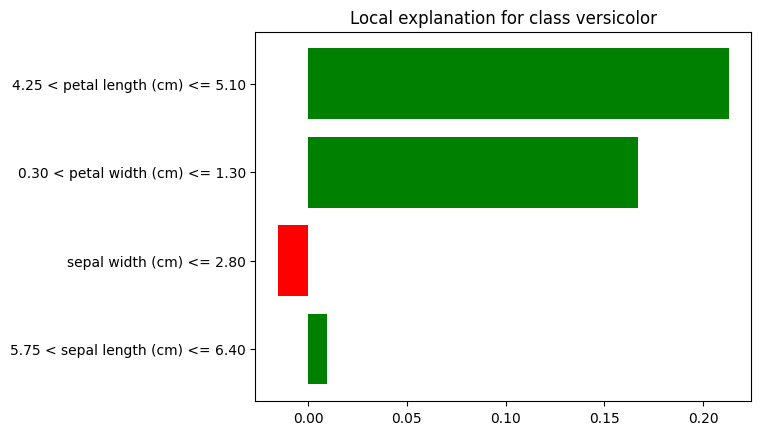

In [ ]:
explainer=lime.lime_tabular.LimeTabularExplainer(X_train,feature_names=feature_name, class_names=class_name)
explanation=explainer.explain_instance(instance,model.predict_proba,num_features=len(feature_name))
#plot
fig=explanation.as_pyplot_figure()
# plt.title["Lime exp"]
plt.show()